In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Goals:
Demonstrate various graphing ability and experiment with the KDE estimators using given data

Load Data

In [3]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


List the columns of the data frame with their descriptions

In [4]:

printed= list(wb)
printed


['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Scale the Data so that the series contain data on both literature rates and income.


In [5]:

#create a new dataframe df with the index from wb
df = pd.DataFrame(index=wb.index)

#copies of the Series we want
df['literacy'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']
df['income'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records from df that have a NaN value in either column
df=df.dropna()

# compare the lenghts of wb and df
wsize= len(wb)
dsize = len(df)

print(wsize)
print(dsize)

216
147


In [6]:
# inspecting the head of df
df.head(5)

,literacy,income
Afghanistan,18.0,580.0
Albania,96.0,4250.0
Algeria,68.0,4270.0
Angola,60.0,3440.0
Antigua and Barbuda,99.0,13400.0


## Build a histogram with the data to see the distribution literacy rates and income per capita indivudally

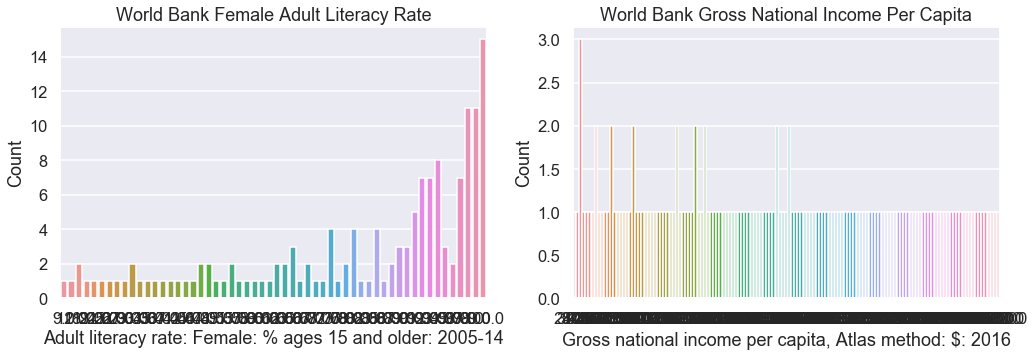

In [7]:


plt.figure(figsize=(15,5))
lit = df['literacy']
inc = df['income']

plt.subplot(1,2,1)
sns.countplot(lit).set_title('World Bank Female Adult Literacy Rate')
plt.xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(inc).set_title('World Bank Gross National Income Per Capita')
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.ylabel('Count')

plt.show()


## Why doesnt countlplot look right?

In [8]:

answer = "Due to the massive amount of indexes from all these difference countries, the data becomes extremly muddied and impossible to read."


## How does a bar plot look?

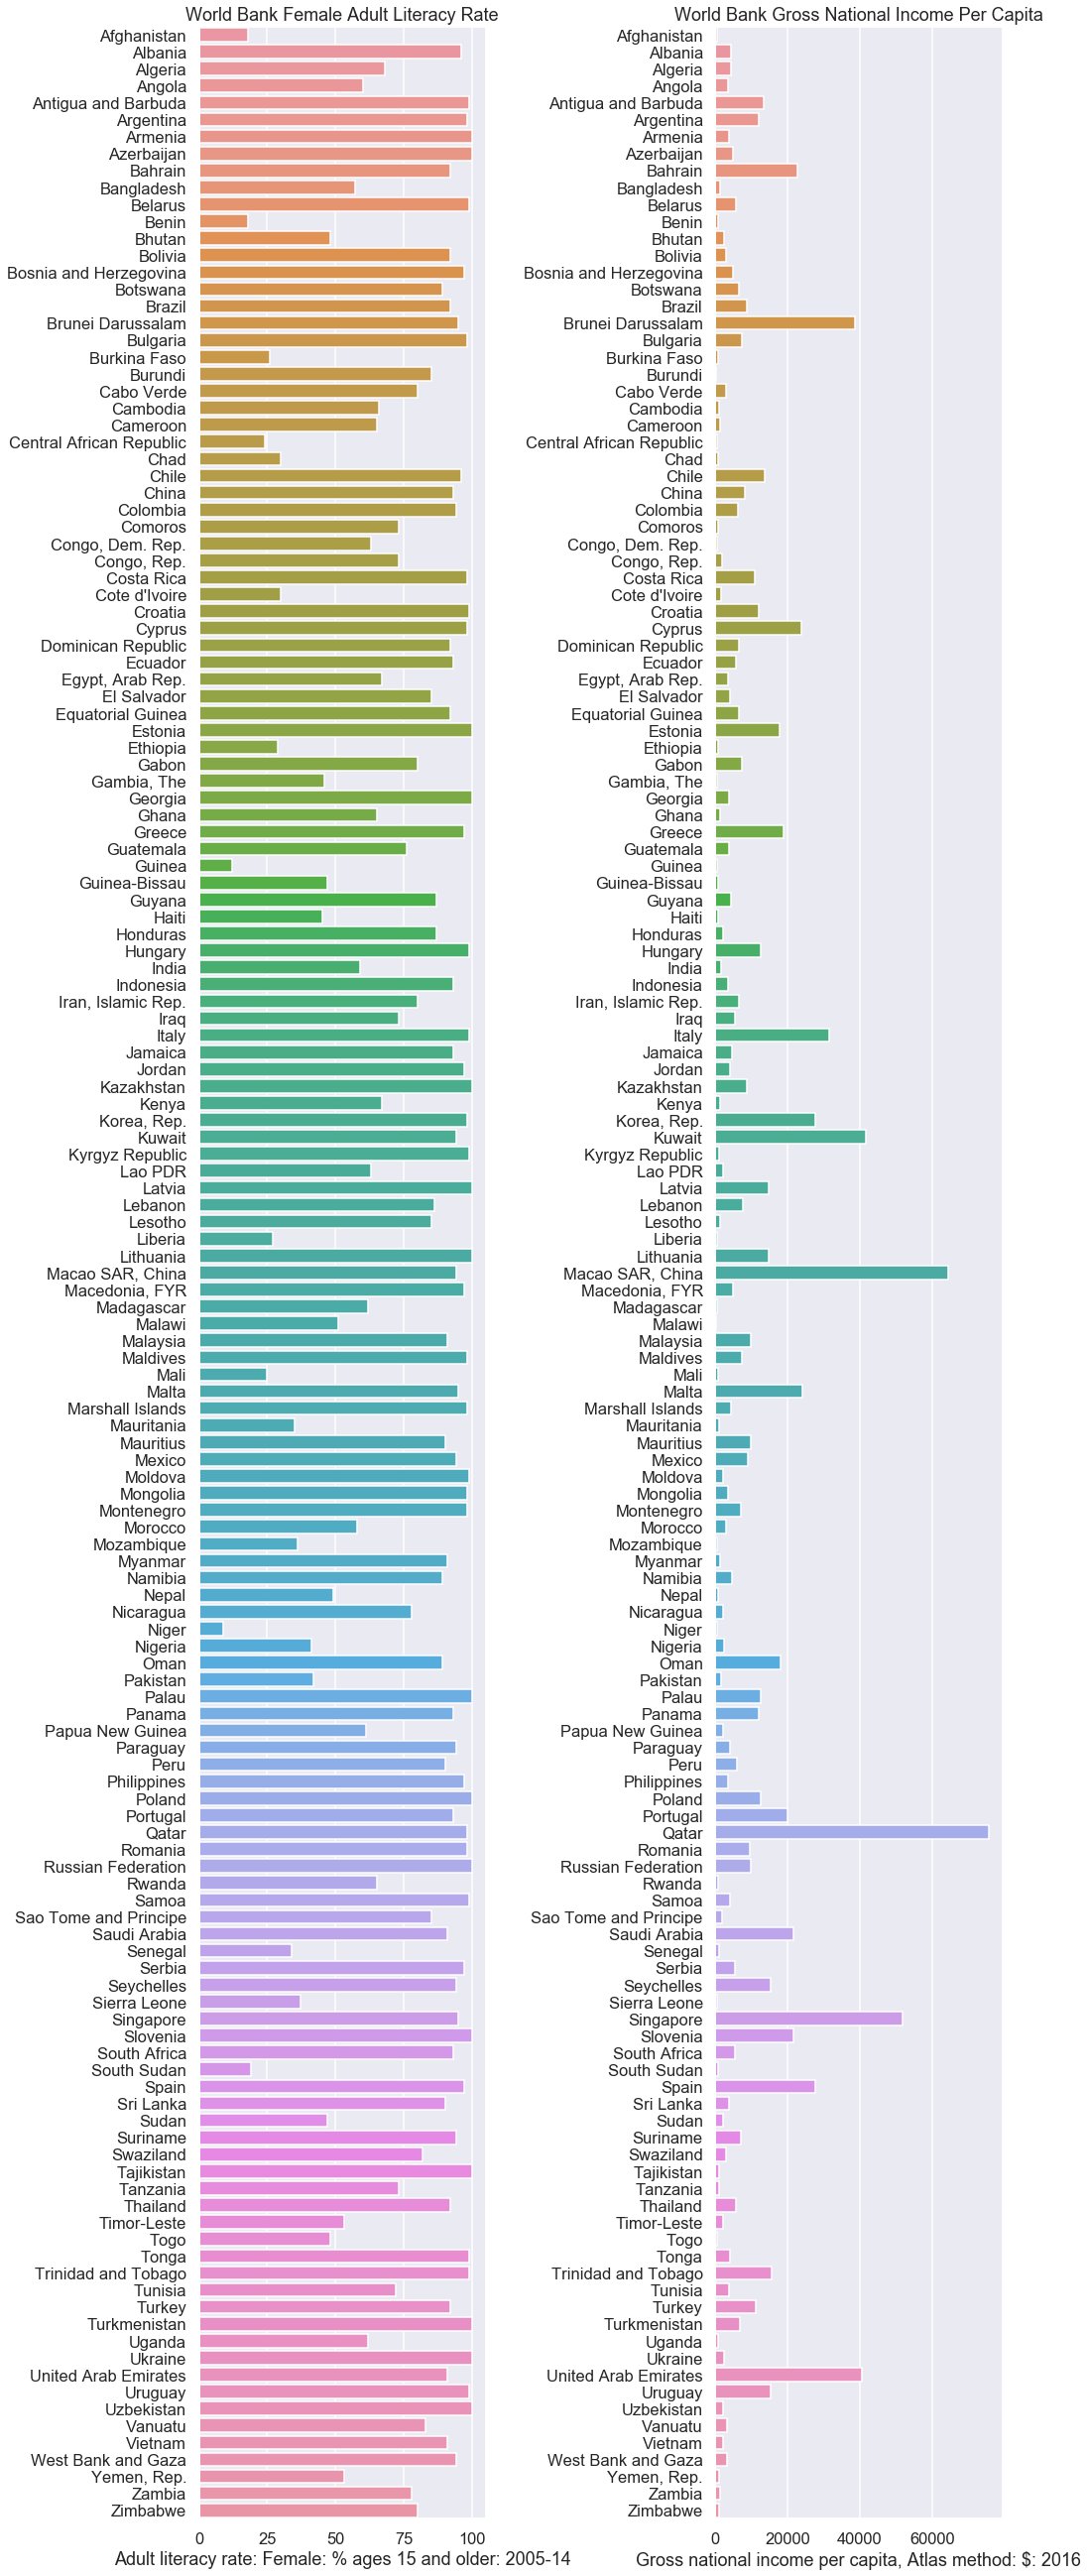

In [9]:


plt.figure(figsize=(15,5))
lit = df['literacy']
inc = df['income']

plt.subplot(1,2,1)
sns.barplot(x=lit, y=df.index, data=df)
plt.title("World Bank Female Adult Literacy Rate")
plt.xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')


plt.subplot(1,2,2)
sns.barplot(x=inc, y= df.index,data = df)
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')


plt.subplots_adjust(top=7, bottom=0.02, left=0.05, right=0.80, hspace=.001,wspace=.8)
plt.show()



## Create a plot of literacy rate and income per capita using the `distplot` function. The left subplot is literacy, and the right subplot is income. 


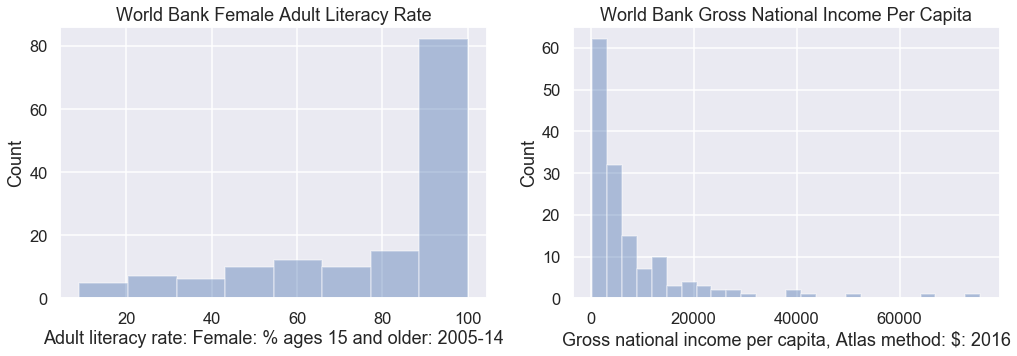

In [10]:

plt.figure(figsize=(15,5))
lit = df['literacy']
inc = df['income']

plt.subplot(1,2,1)
sns.distplot(lit, kde=False)
plt.title("World Bank Female Adult Literacy Rate")
plt.xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.distplot(inc, kde=False)
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.ylabel('Count')

plt.show()


## SNS version of the plots with rug set to True

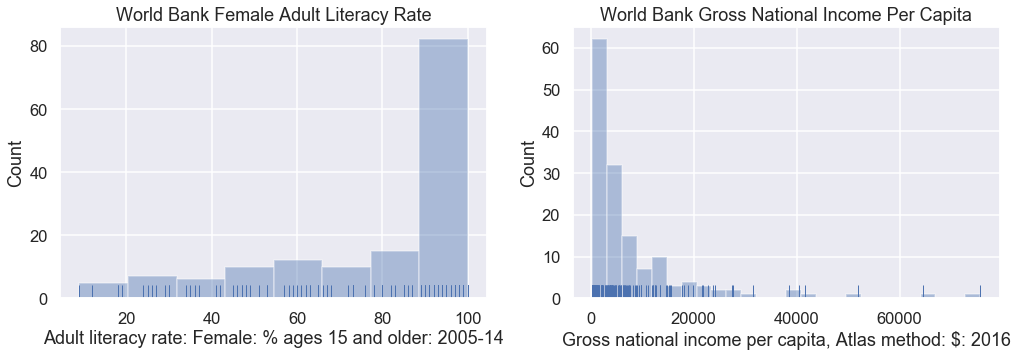

In [11]:


plt.figure(figsize=(15,5))
lit = df['literacy']
inc = df['income']

plt.subplot(1,2,1)
sns.distplot(lit, kde=False, rug=True)
plt.title("World Bank Female Adult Literacy Rate")
plt.xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.distplot(inc, kde=False, rug=True)
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.ylabel('Count')

plt.show()



## The same plot but showing the KDE values associated with it.

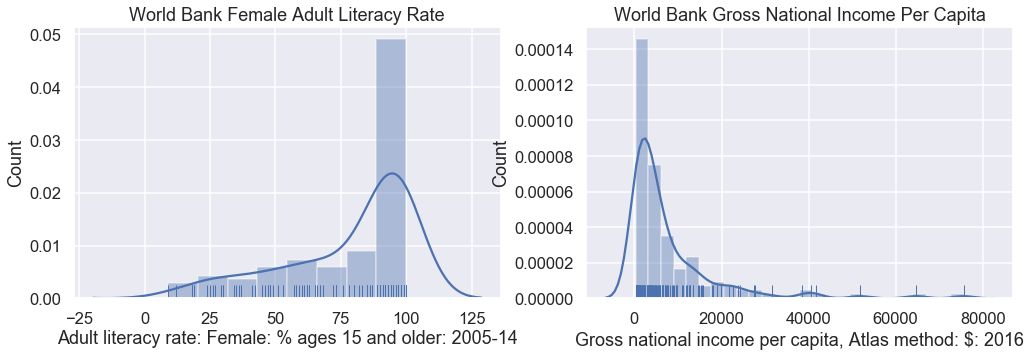

In [12]:


plt.figure(figsize=(15,5))
lit = df['literacy']
inc = df['income']

plt.subplot(1,2,1)
sns.distplot(lit, kde=True, rug=True)
plt.title("World Bank Female Adult Literacy Rate")
plt.xlabel('Adult literacy rate: Female: % ages 15 and older: 2005-14')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.distplot(inc, kde=True, rug=True)
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')
plt.ylabel('Count')

plt.show()



##  logarithmically transform the `income` data to give us a visual representation that makes it easier to see patterns and also give a more reasonable KDE. This is intended to see the distrubition among higher income countries better.


Text(0.5, 0, 'Gross national income per capita, Atlas method: $: 2016')

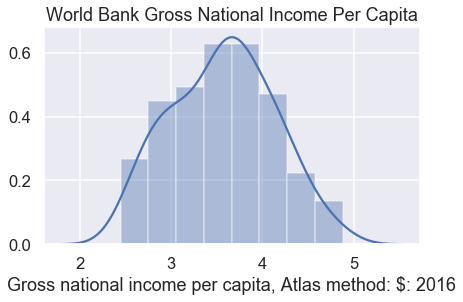

In [15]:
plt.figure()



inc = df['income']

lastone = inc.transform(np.log10)

sns.distplot(lastone, kde=True)
plt.title("World Bank Gross National Income Per Capita")
plt.xlabel('Gross national income per capita, Atlas method: $: 2016')





# Kernel Density Estimation



Throwaway example of KDE before getting deeper into it.

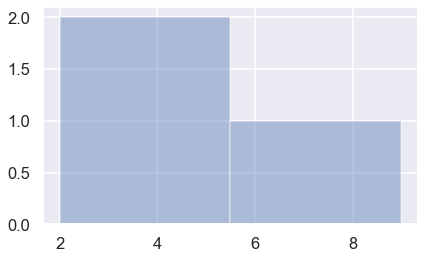

In [16]:
data3pts = np.array([2, 4, 9])
sns.distplot(data3pts, kde = False);

By setting `kde=True`, we can see a kernel density estimate of the data.

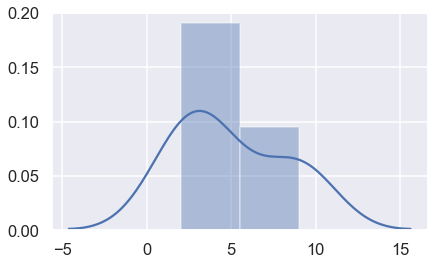

In [17]:
sns.distplot(data3pts, kde = True);

Experimenting with a different bandwidth value.

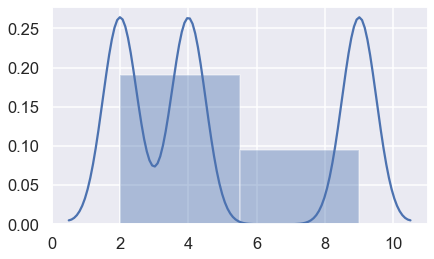

In [18]:
sns.distplot(data3pts, kde = True, kde_kws = {"bw": 0.5});

## By using the gauassian equation listed below we can understand the type of data KDE can output.


$$\Large
K_\alpha(x, z) = \frac{1}{\sqrt{2 \pi \alpha^2}} \exp\left(-\frac{(x - z)^2}{2  \alpha ^2} \right)
$$

In Python code, this function is given as below, where `alpha` is the parameter $\alpha$, `z` is the x coordinate of the center of the Gaussian (i.e. a data point), and `x` is the independent variable. 

In [19]:

def gaussian_kernel(alpha, x, z):
    #output = 1/(np.sqrt(2*np.pi*(alpha**2)
    #outputs = np.exp(-1*((x-z)**2)/(2*(alpha**2))
    #return output * output2
    
    output = (1/(np.sqrt(2*np.pi*(alpha**2)))) * (np.exp(-1*((x-z)**2)/(2*(alpha**2))))
    return output


For example, we can plot the gaussian kernel centered on $x$ coordinate 9 with $\alpha$ = 0.5 as below: 

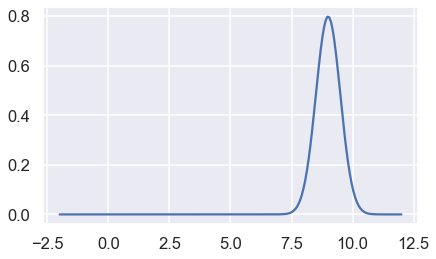

In [20]:
xs = np.linspace(-2, 12, 200)
alpha=0.5
kde_curve = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, kde_curve);

## Plot the 3 KD functions concering the last 3 data points. Using an alpha of .5.


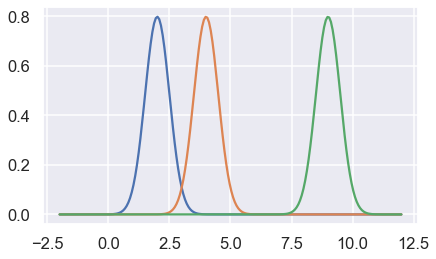

In [49]:

xs = np.linspace(-2, 12, 200)
alpha=0.5

curvea = [gaussian_kernel(alpha, x, 2) for x in xs]
plt.plot(xs, curvea);

curveb = [gaussian_kernel(alpha, x, 4) for x in xs]
plt.plot(xs, curveb);

curvec = [gaussian_kernel(alpha, x, 9) for x in xs]
plt.plot(xs, curvec);



## Create a plot showing the sum of all three of the kernels above


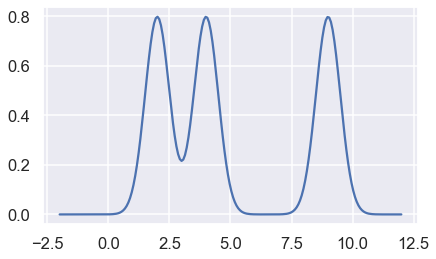

In [50]:

xs = np.linspace(-2, 12, 200)
alpha=0.5

sumk = np.sum(([gaussian_kernel(alpha, x, data3pts) for x in xs]), axis = 1)
plt.plot(xs, sumk);


## Implement the KDE function which computes the equation listed below



$$\Large
f_\alpha(x) = \frac{1}{n} \sum_{i=1}^n K_\alpha(x, z_i)
$$

Where $z_i$ are the data, $\alpha$ is a parameter to control the smoothness, and $K_\alpha$ is the kernel density function passed as `kernel`.

In [41]:
def kde(kernel, alpha, x, data):
    """
    Compute the kernel density estimate for the single query point x.

    Args:
        kernel: a kernel function with 3 parameters: alpha, x, data
        alpha: the smoothing parameter to pass to the kernel
        x: a single query point (in one dimension)
        data: a numpy array of data points

    Returns:
        The smoothed estimate at the query point x
    """
            
    
    #sigma can be sum
    return (1/len(data))*(np.sum(kernel(alpha, x, data)))
    
   


## Generate the `kde` of the log of the income data as before.

C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


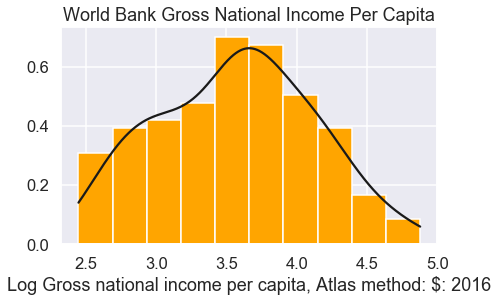

In [42]:
df['trans_inc'] = np.log10(df['income'])
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
plt.hist(df['trans_inc'], normed=True, color='orange')
plt.title('World Bank Gross National Income Per Capita')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');
plt.plot(xs, curve, 'k-');

## Generate a 3 x 3 set of plots showing the outputs for kde for different alpha values.


C:\Users\Artem\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


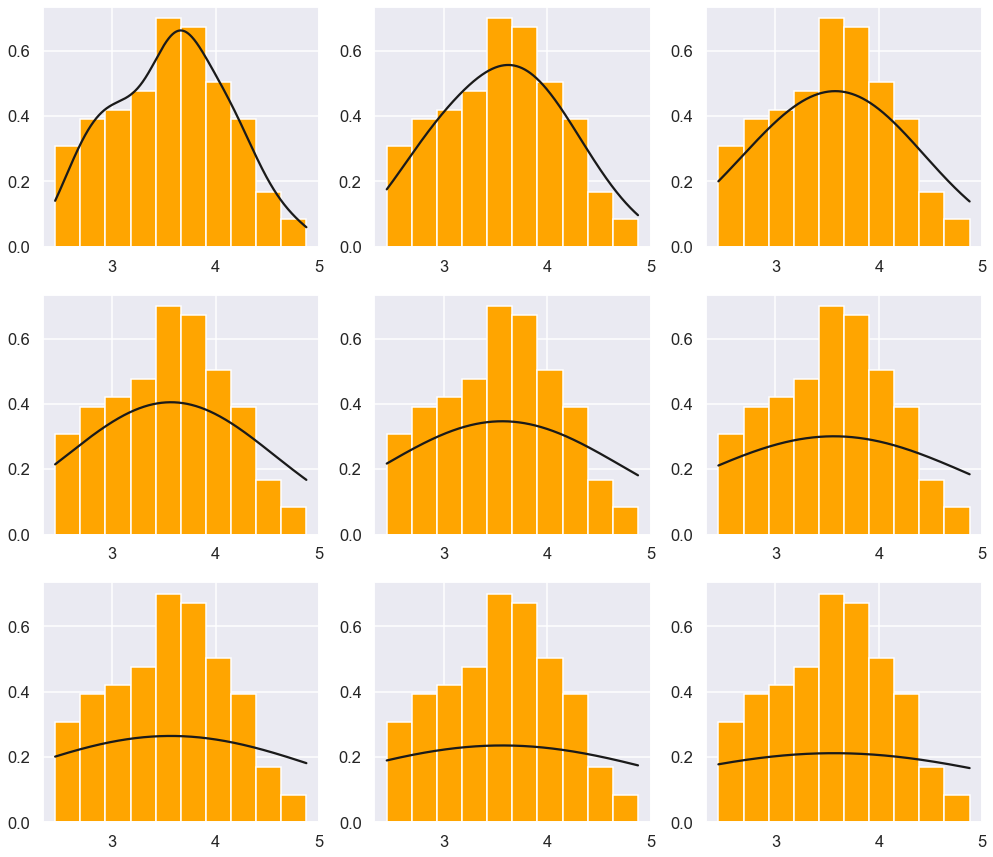

In [43]:


plt.figure(figsize=(15,15))
alphas = np.arange(0.2, 2.0, 0.2)
for i, alpha in enumerate(alphas):
    plt.subplot(3, 3, i+1)
    xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
    curve = [kde(gaussian_kernel, alpha, x, df['trans_inc']) for x in xs]
    plt.hist(df['trans_inc'], normed=True, color='orange')
    plt.plot(xs, curve, 'k-')
plt.show()



## Examing the boxcar kernel.

In [44]:
def boxcar_kernel(alpha, x, z):
    return (((x-z)>=-alpha/2)&((x-z)<=alpha/2))/alpha

In [45]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


## By plotting both the boxcar and Gaussian Kernels I can see the clear difference between both.

In [46]:
import numpy as np
x = np.linspace(-10,10,1000)
def f(alpha):
    plt.plot(x, boxcar_kernel(alpha,x,0), label='Boxcar')
    plt.plot(x, gaussian_kernel(alpha,x,0), label='Gaussian')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='alpha', max=10.0, min=1.0), Output()), _dom_classes=…

## With this interactive plot I compare both the functions values.

In [47]:
xs = np.linspace(df['trans_inc'].min(), df['trans_inc'].max(), 1000)
def f(alpha_g, alpha_b):
    plt.hist(df['trans_inc'], normed=True, color='orange')
    g_curve = [kde(gaussian_kernel, alpha_g, x, df['trans_inc']) for x in xs]
    plt.plot(xs, g_curve, 'k-', label='Gaussian')
    b_curve = [kde(boxcar_kernel, alpha_b, x, df['trans_inc']) for x in xs]
    plt.plot(xs, b_curve, 'r-', label='Boxcar')
    plt.legend(title='Kernel Function')
    plt.show()
interact(f, alpha_g=(0.01,.5,0.01), alpha_b=(0.01,3,0.1));

interactive(children=(FloatSlider(value=0.25, description='alpha_g', max=0.5, min=0.01, step=0.01), FloatSlide…


## From the given graphs Gaussian does a better job of representing KDE and smoothing the kernels. 
## Although both the Gaussian and Boxcar plots seem to follow the same general trend of the KDE.
## The BoxCar is better at showing the specific points of the kernel function.
